# First Attempt
batch size 256 lr 1e-4

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.
/home/giles/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Options

In [2]:
classTrainFeatures = basic_features
classModel = 'modelSelu'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 10000
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt', 'DER_deltar_tau_lep', 'PRI_jet_leading_eta', 'PRI_lep_eta', 'PRI_tau_eta', 'DER_lep_eta_centrality', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet', 'DER_pt_tot', 'DER_met_phi_centrality', 'PRI_jet_num', 'PRI_met', 'DER_pt_h', 'DER_pt_ratio_lep_tau', 'DER_sum_pt', 'PRI_jet_leading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_prodeta_jet_jet', 'PRI_lep_pt', 'PRI_jet_subleading_pt', 'PRI_met_phi', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_jet_subleading_phi', 'PRI_tau_phi']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 33.660s 


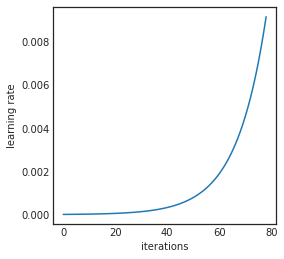

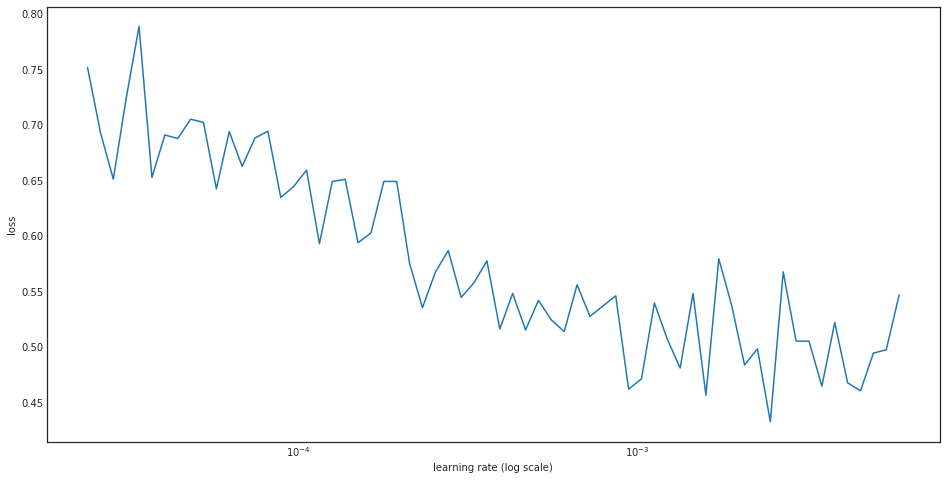

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-2], trainOnWeights=False, verbose=0)

In [5]:
compileArgs['lr'] = 1e-4

## Train classifier

Using cosine annealing
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 0.547995636975
2 New best found: 0.509605763126
3 New best found: 0.49553750825
4 New best found: 0.485905454547
5 New best found: 0.47800045572
6 New best found: 0.471089374312
7 New best found: 0.463774334812
8 New best found: 0.459254650645
9 New best found: 0.453460886385
10 New best found: 0.448261827378
11 New best found: 0.44412690413
12 New best found: 0.439965741827
13 New best found: 0.43606818699
14 New best found: 0.432663666212
15 New best found: 0.428730201494
16 New best found: 0.42571038001
17 New best found: 0.42316172928
18 New best found: 0.419678238681
19 New best found: 0.417513041833
20 New best found: 0.415286096299
21 New best found: 0.413099326936
22 New best found: 0.411198684975
23 New best found: 0.409383571896
24 New best found: 0.407705782957
25 New best found: 0.406620281882
26 New best found: 0.406050084276
27 New best found: 0.40404949635
28 New best fo

1 New best found: 0.555316711651
2 New best found: 0.516398002692
3 New best found: 0.501619690046
4 New best found: 0.490715786291
5 New best found: 0.482725943521
6 New best found: 0.475120390137
7 New best found: 0.468933439012
8 New best found: 0.463607827533
9 New best found: 0.458209917466
10 New best found: 0.454176527683
11 New best found: 0.450736384589
12 New best found: 0.446788974881
13 New best found: 0.443574391924
14 New best found: 0.440387444212
15 New best found: 0.437349524446
16 New best found: 0.433939460614
17 New best found: 0.430997260636
18 New best found: 0.428929849166
19 New best found: 0.425288315064
20 New best found: 0.422303479818
21 New best found: 0.418892530577
22 New best found: 0.41653541253
23 New best found: 0.413587195972
24 New best found: 0.411296426901
25 New best found: 0.409205116062
26 New best found: 0.407276126455
27 New best found: 0.40551430079
28 New best found: 0.404996602215
29 New best found: 0.402710981586
30 New best found: 0.4008

21 New best found: 0.404866714191
22 New best found: 0.402562011814
23 New best found: 0.401115430784
24 New best found: 0.399635663557
25 New best found: 0.398245813584
26 New best found: 0.397901874185
27 New best found: 0.396177973962
28 New best found: 0.39543217268
29 New best found: 0.394495150709
31 New best found: 0.393490258813
32 New best found: 0.392354431343
33 New best found: 0.391696470976
34 New best found: 0.391027586555
35 New best found: 0.390253078103
36 New best found: 0.390227862287
37 New best found: 0.389386461973
38 New best found: 0.388593077874
39 New best found: 0.388262240028
40 New best found: 0.388167141199
41 New best found: 0.387488481164
42 New best found: 0.38683912735
43 New best found: 0.386034224105
44 New best found: 0.385836495376
45 New best found: 0.385555296111
46 New best found: 0.38533200171
47 New best found: 0.384941290545
48 New best found: 0.384548497248
50 New best found: 0.383867984629
51 New best found: 0.383393707848
52 New best found

68 New best found: 0.386493966866
70 New best found: 0.385988327336
71 New best found: 0.385549522877
72 New best found: 0.38487779808
75 New best found: 0.384803901649
76 New best found: 0.38465174396
79 New best found: 0.38397960813
80 New best found: 0.383298461652
81 New best found: 0.382834335756
86 New best found: 0.382524478245
89 New best found: 0.382024264956
90 New best found: 0.381281047559
91 New best found: 0.381142126369
96 New best found: 0.380384475613
99 New best found: 0.380352503133
100 New best found: 0.380197831726
104 New best found: 0.379820340633
105 New best found: 0.379220018625
108 New best found: 0.378999897313
112 New best found: 0.378788232565
114 New best found: 0.378647907019
115 New best found: 0.378573500848
116 New best found: 0.378334361863
117 New best found: 0.378174578118
120 New best found: 0.378052214456
122 New best found: 0.377668334413
123 New best found: 0.377477654338
127 New best found: 0.376893353462
129 New best found: 0.376887382269
130

153 New best found: 0.375182794418
154 New best found: 0.375057779334
159 New best found: 0.375056927657
161 New best found: 0.374890970221
163 New best found: 0.374729154101
164 New best found: 0.374606142888
168 New best found: 0.374601019151
172 New best found: 0.374443576207
177 New best found: 0.37421521251
179 New best found: 0.373845005977
180 New best found: 0.373699620353
186 New best found: 0.373312750927
195 New best found: 0.373263792536
197 New best found: 0.373137153528
199 New best found: 0.372971134595
204 New best found: 0.372760072412
213 New best found: 0.372497412236
216 New best found: 0.372328928819
224 New best found: 0.372162133357
226 New best found: 0.372021293538
234 New best found: 0.371636654383
244 New best found: 0.371356838609
245 New best found: 0.371340361413
253 New best found: 0.371117568583
Early stopping after 263 epochs
Score is: {'loss': 0.37111756858262274, 'AUC': 0.097771575234263164, 'wAUC': 0.071518027446357824}
Fold took 252.965s

Running fo

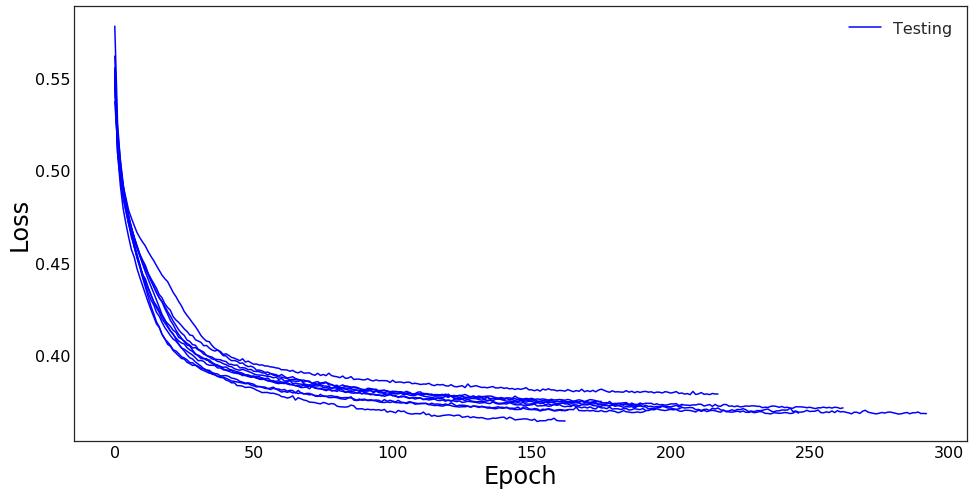

Mean wAUC = 0.0725 +- 0.0006
______________________________________



In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, useCosAnneal=True, trainOnWeights=False, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [ ]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [ ]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

## Response on development data

In [ ]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

In [ ]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

## Response on val data

In [ ]:
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

In [ ]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', testData), getFeature('pred', testData)),
                                                           roc_auc_score(getFeature('targets', testData), getFeature('pred', testData), sample_weight=getFeature('weights', testData)))

## Evaluation

### Import in dataframe

In [ ]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'gen_sample', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['gen_sample'] = getFeature('gen_sample', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [ ]:
devData = convertToDF(trainData)
valData = convertToDF(testData)

In [ ]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### ROC curve

In [ ]:
rocPlot(inData=[devData, valData],
        params=[{'linestyle':'dashed', 'color':'b'}, {'color':'b'}],
        labels=['Train', 'Test'], weightName='gen_weight')

### MVA distributions

In [ ]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [ ]:
getSamplePredPlot(valData)

## Save classified data

In [ ]:
name = dirLoc + signal + "_" + channel + "_" + varSet + '_' + classModel + '_classifiedData.csv'
print "Saving data to", name
valData.to_csv(name, columns=['gen_target', 'gen_weight', 'gen_sample', 'pred_class'])

## Save/load

In [ ]:
name = "weights/DNN_" + signal + "_" + channel + "_" + varSet + '_' + classModel
print name

### Save

In [ ]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

### Load

In [ ]:
ensemble, weights, compileArgs, inputPipe, outputPipe = loadEnsemble(name)